# Лабораторная работа № 2

Выполнила студентка группы 9381 Андрух Ирина

## Цель работы
Цель работы – практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.

## Данные для работы
1) Средствами ОС Windows записать свой речевой сигнал.  
2) Фраза — Добрый день, я учусь в университете ЛЭТИ, на факультете компьютерных технологий и информатики.  
3) Формат записи — моно-сигнал, 16000 гц или 22000 гц, без сжатия (wav-формат).  

## Задачи лабораторной работы

1) Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.  
2) Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.  
3) Построить сонограмму по записи своего голоса.  


In [7]:
from scipy.io import wavfile
import scipy.io

frequency, data = wavfile.read('C:/Users/Ирина/Music/mathpac_lb2_good.wav')#частота дискретизации и данные из файла

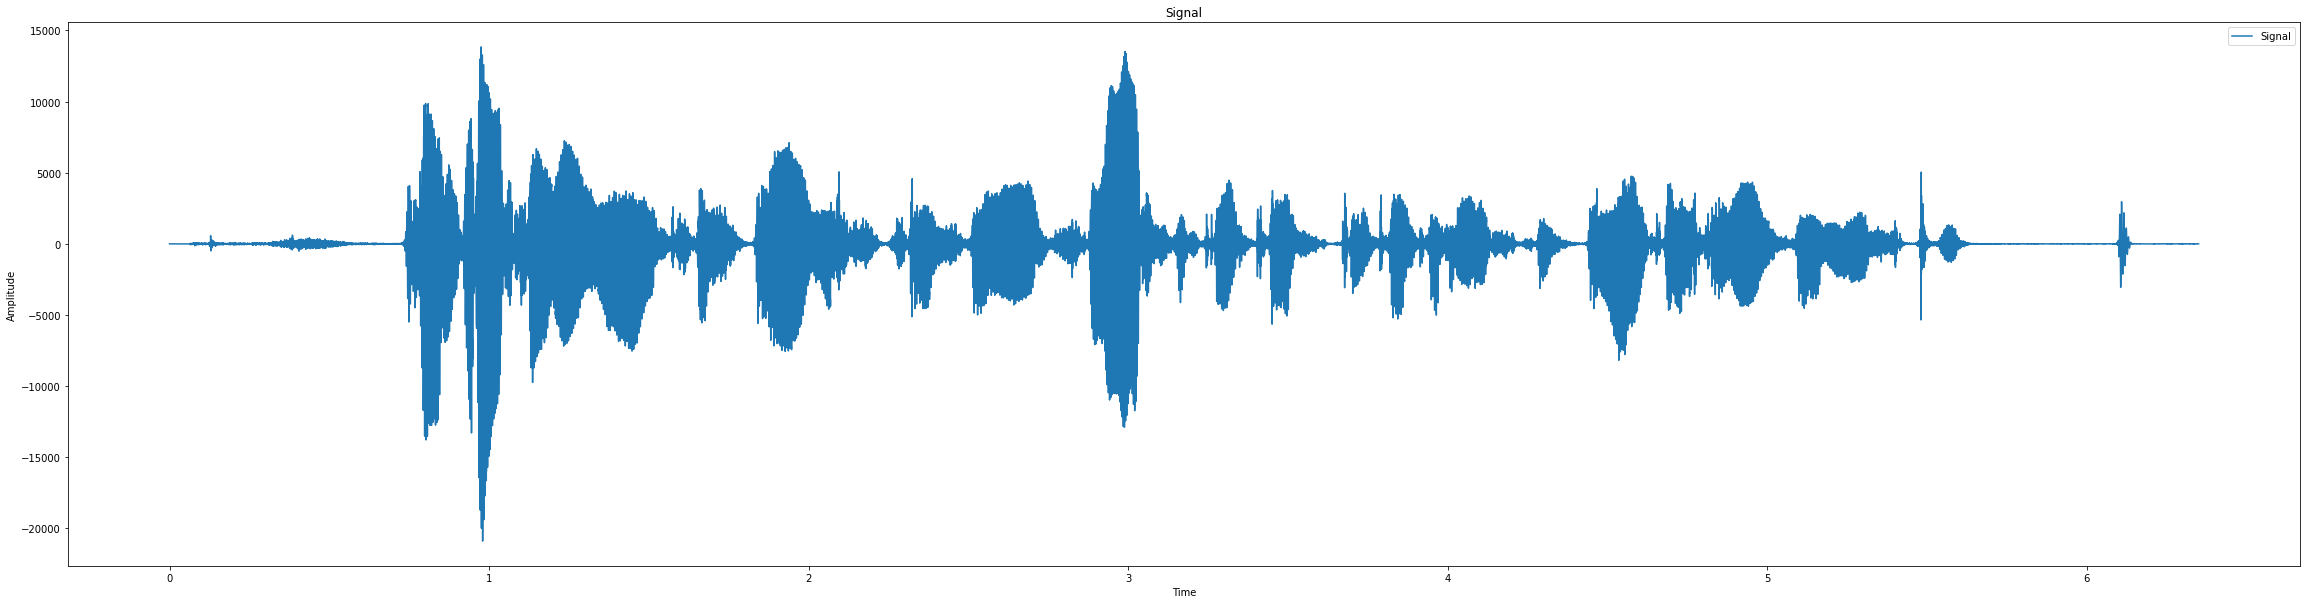

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import more_itertools as mit
import pandas
import plotly.express as px

length = len(data) / frequency
time = np.linspace(0, length, len(data))
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.title("Signal")
plt.plot(time, data, label="Signal")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.

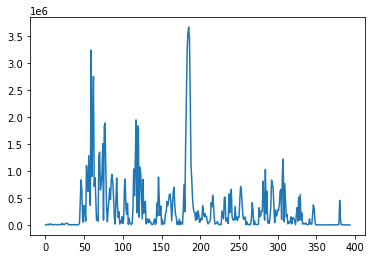

In [14]:
overlay = 0.25
size_dpf = 1024
s_r = round(frequency/size_dpf)
distance = list(mit.windowed(data, n=size_dpf, step=int(overlay*size_dpf)))
distance[-1] = [i for i in distance[-1] if i]
distance = [i*np.hamming(len(i)) for i in distance]
def DPF(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

distance = [DPF(i) for i in distance]
amplitude = [sum([j**2 for j in i[:int(len(i)/2)]])**0.5 for i in distance]
amplitude = np.array([i.real for i in amplitude])
plt.plot(amplitude)

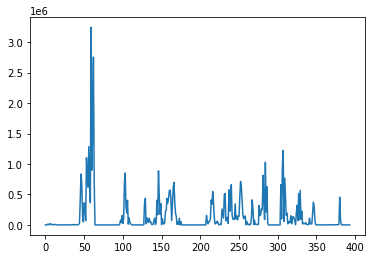

In [15]:
F_0 = []   
for i in list(mit.chunked(amplitude, s_r)):
    seg = np.array(i)
    if seg.max() > 2.5*seg.mean():            
        F_0 += seg.tolist()
    else:
        F_0 += [0 for i in range(len(seg))]

plt.plot(F_0) 

# Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.

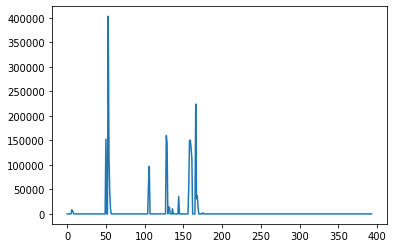

In [16]:
F_1 = []
i = 0
while i < len(F_0):
    try:
        dist_max = max([F_0[2*i], F_0[2*i-1], F_0[2*i+1]])
        if F_0[i] > 2*dist_max:           
            F_1.append(dist_max)
        else:
            F_1.append(0)
    except:
        F_1.append(0)
    i += 1
    

plt.plot(F_1)   

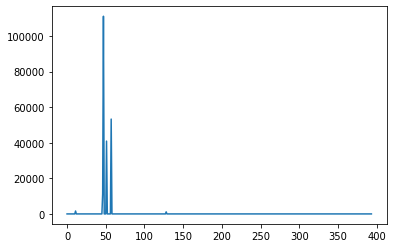

In [17]:
F_2 = []
i = 0
while i < len(F_0):
    try:
        dist_max = max([F_0[3*i], F_0[3*i-1], F_0[3*i+1]])
        if F_0[i] > 4*dist_max:           
            F_2.append(dist_max)
        else:
            F_2.append(0)
    except:
        F_2.append(0)
    i += 1
    

plt.plot(F_2) 

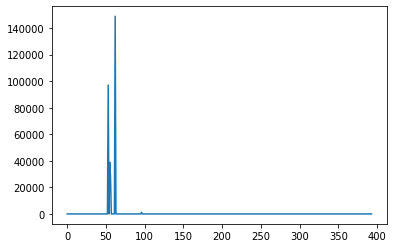

In [18]:
F_3 = []
i = 0
while i < len(F_0):
    try:
        dist_max = max([F_0[4*i], F_0[4*i-1], F_0[4*i+1]])
        if F_0[i] > 8*dist_max:           
            F_3.append(dist_max)
        else:
            F_3.append(0)
    except:
        F_3.append(0)
    i += 1
    

plt.plot(F_3) 

# Построить сонограмму по записи своего голоса.

In [72]:
amps = []

for i in range(0, len(amplitude), s_r):
    seg = list(amplitude[i:i+s_r])  
    amps.append(seg)
amps = amps[:-1]
amps = np.array(amps)
amps.reshape(len(amps), len(amps[0]))
fig = px.imshow(amps)
fig.show()

## Вывод

С использованием ДПФ была построена траектория основного тона (F0), траектории второй, третьей и четвертой формантных частот, а также сонограмма.